In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [2]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print('X_train:' , x_train.shape)
print('Y_train:' , y_train.shape)
print('X_test:'  , x_test.shape)
print('Y_test:'  , y_test.shape)



X_train: (60000, 784)
Y_train: (60000, 10)
X_test: (10000, 784)
Y_test: (10000, 10)


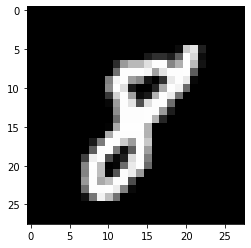

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [3]:
from matplotlib import pyplot
pyplot.imshow(x_train.reshape(60000,-28,28)[17], cmap='gray')
pyplot.show()
print(y_train[17])

In [4]:
from tensorflow.keras import layers

def Model():
    layer1 = layers.Dense(200,activation="tanh",use_bias=True,kernel_initializer="glorot_normal"
                      ,bias_initializer="zeros" , input_shape = (x_train.shape[1],))
    layer2 = layers.Dense(100,activation="tanh",use_bias=True
                      ,bias_initializer="zeros")
    layer3 = layers.Dense(10,activation="softmax",use_bias=True
                      ,bias_initializer="zeros")

    return tf.keras.Sequential([layer1,layer2,layer3])


In [17]:
 callback = [tf.keras.callbacks.TensorBoard(log_dir='./tb_logs1' ,histogram_freq = 1,write_graph=True,
                        write_images=True,update_freq="epochs"
                        ,profile_batch=2,embeddings_freq=1)]

In [18]:
from keras import losses,metrics,optimizers

model = Model()

lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.5)

sgd = tf.keras.optimizers.SGD(learning_rate=lr)

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = sgd , metrics = ["accuracy"])
result = model.fit(x_train,y_train,epochs = 25,callbacks=callback)

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6447 - accuracy: 0.8163
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4325 - accuracy: 0.8732
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3890 - accuracy: 0.8845
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3543 - accuracy: 0.8928
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3203 - accuracy: 0.9035
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2944 - accuracy: 0.9123
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9148
Epoch 8/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2709 - accuracy: 0.9171
Epoch 9/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2548 - accuracy: 0.9229
Epoch 10/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

In [19]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               157000    
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________
None


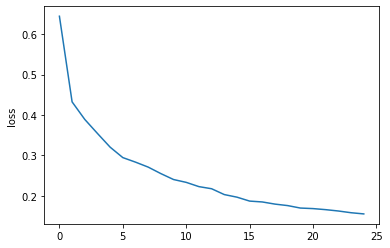

In [32]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(result.history['loss'])
plt.ylabel('loss')
plt.show()

In [30]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [21]:
%tensorboard --logdir ./tb_logs --host localhost

Reusing TensorBoard on port 6006 (pid 21644), started 0:01:16 ago. (Use '!kill 21644' to kill it.)

In [22]:
test = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 955us/step - loss: 0.1749 - accuracy: 0.9466


In [23]:
print("loss :" , test[0] , "accuracy :", test[1])

loss : 0.1748974621295929 accuracy : 0.9466000199317932


In [24]:
model.save_weights('./checkPoint.cpkt')